In [192]:
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from numpy import genfromtxt
from scipy.spatial.distance import cdist
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler



In [240]:
data = pd.read_csv('./paper_source/static_grid/japan4road_15min_1005.txt',names=['grid_id','object_type','size','direction', 'velocity'])
# road_user_mean_transactions.txt
df = pd.DataFrame(data)
std_scaler = StandardScaler()
minMaxScaler = MinMaxScaler()

# df1= df[df.object_type == 20] # select multiple columns
# df1.head(5)
df.head(5)

FileNotFoundError: File b'./paper_source/static_grid/japan4road_15min_1005.txt' does not exist

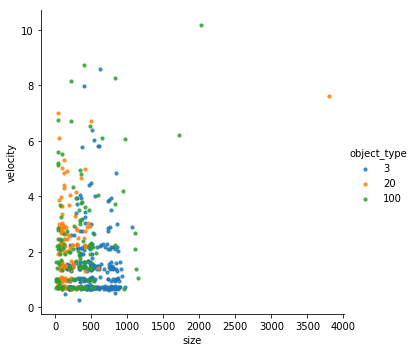

In [244]:

# selected = df1[['v_mean','d_mean']]
# selected.head(5)
sns.lmplot('size','velocity', data=df, fit_reg=False, scatter_kws={"s": 10}, hue='object_type')
# df.plot.scatter(x='s_mean',y='v_mean',marker='.')

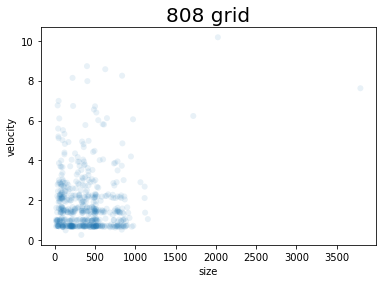

In [229]:
# df['size'] = df['size']/ 100
# df.head(5)
# sns.lmplot('size','velocity', data=df, fit_reg=False, scatter_kws={"s": 10}, alpha=0.2, hue="object_type")
ax = sns.scatterplot(x='size', 
                     y='velocity', 
                     alpha=0.1,
                     edgecolor = 'none',
                     data=df)
plt.title('808 grid', fontsize=20)

plt.show()


In [230]:
# # sns.lmplot('size','velocity', data=df2, fit_reg=False, scatter_kws={"s": 10}, hue="object_type")
# kmeans = KMeans(n_clusters=2).fit(df)

# kmeans.cluster_centers_
# # 데이터 중심에 클러스트


# kmeans.labels_




# # df['cluster_id'] = kmeans.labels_
# # In[65]:
# df.head(10)
# data_points = df.values

# sns.lmplot('size','velocity',data=df, fit_reg=False, scatter_kws={"s":10}, hue="cluster_id")



In [231]:
# standard normalize
df2 = df[['size','velocity']]
fitted = std_scaler.fit(df2)
print(fitted.mean_)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
output = std_scaler.transform(df2)
output = pd.DataFrame(output, columns=df2.columns, index=list(df2.index.values))
print(output.head())
output.head(5)

kmeans_normal = KMeans(n_clusters=2).fit(output)
kmeans_normal.cluster_centers_
# 데이터 중심에 클러스트


kmeans_normal.labels_

output['cluster_id'] = kmeans_normal.labels_


[386.71126761   1.84010781]
       size  velocity
0 -1.037456  1.268644
1 -1.050559  0.064927
2 -0.932633  2.503210
3 -0.988320 -0.099469
4 -0.932633 -0.810608


,size,velocity,cluster_id
0,-1.037456,1.268644,0
1,-1.050559,0.064927,1
2,-0.932633,2.503210,0
3,-0.988320,-0.099469,1
4,-0.932633,-0.810608,1
5,-0.765572,0.122669,1
6,-0.808156,-0.786387,1
7,-0.906427,-0.236609,1
8,-0.716436,0.428497,1
9,-0.264387,0.306316,1


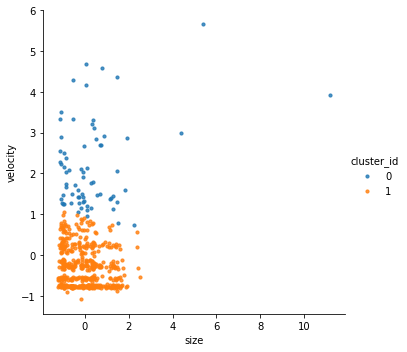

In [232]:
data_points_normal = output.values
#클러스트 3개, fit 데이터 설정
#kmeans = KMeans(n_clusters=5).fit(data_points)
# In[62]:


#클러스트 3개, 각각의 데이터에 대한 클러스트가 붙음
#kmeans = KMeans(n_clusters=10).fit(data_points)

sns.lmplot('size','velocity',data=output, fit_reg=False, scatter_kws={"s":10}, hue="cluster_id")
output.head(10)

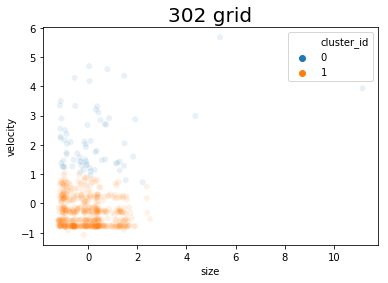

In [233]:
ax = sns.scatterplot(x='size', 
                     y='velocity', 
                     alpha=0.1,
                     hue="cluster_id",
                     edgecolor = 'none',
                     data=output)
plt.title('302 grid', fontsize=20)

plt.show()

In [234]:
# min Max  normalize
df3 = df[['size','velocity']]
fitted2 = minMaxScaler.fit(df3)
#print(fitted2.mean_)
## 출력 결과
## array([4.46000000e+02, 3.83838384e-01, 2.30864198e+00, 2.93615825e+01,
##        5.23007856e-01, 3.81593715e-01, 3.22042080e+01])
output2 = minMaxScaler.transform(df3)
output2 = pd.DataFrame(output2, columns=df3.columns, index=list(df3.index.values))
output2.head(5)

kmeans_normal2 = KMeans(n_clusters=2).fit(output2)
kmeans_normal2.cluster_centers_
# 데이터 중심에 클러스트


kmeans_normal2.labels_

output2['cluster_id'] = kmeans_normal2.labels_
output2.head(5)

,size,velocity,cluster_id
0,0.014289,0.347128,1
1,0.013231,0.168715,0
2,0.022757,0.530114,1
3,0.018259,0.144349,0
4,0.022757,0.038945,0


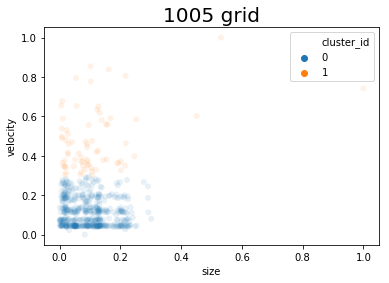

In [238]:
ax2 = sns.scatterplot(x='size', 
                     y='velocity', 
                     alpha=0.1,
                     hue="cluster_id",
                     edgecolor = 'none',
                     data=output2)
plt.title('1005 grid', fontsize=20)

plt.show()

Text(0,0.5,'y')

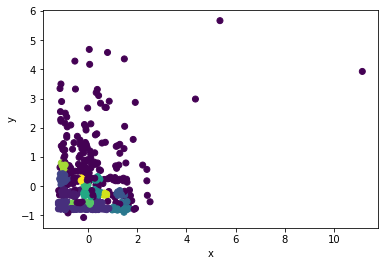

In [236]:
# DBSCAN
scale = StandardScaler()
scale.fit(df[["size", "velocity"]])
scaled_X = scale.transform(df[["size", "velocity"]])

df["scaled_x"] = scaled_X[:,0]
df["scaled_y"] = scaled_X[:,1]

#DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=5) #기본값이다.
cluster = dbscan.fit_predict(scaled_X)
df["cluster"] = cluster

#clustering 결과 확인
plt.scatter(x=df.scaled_x, y=df.scaled_y, c=df.cluster)
plt.xlabel("x")
plt.ylabel("y")
